# Challenge

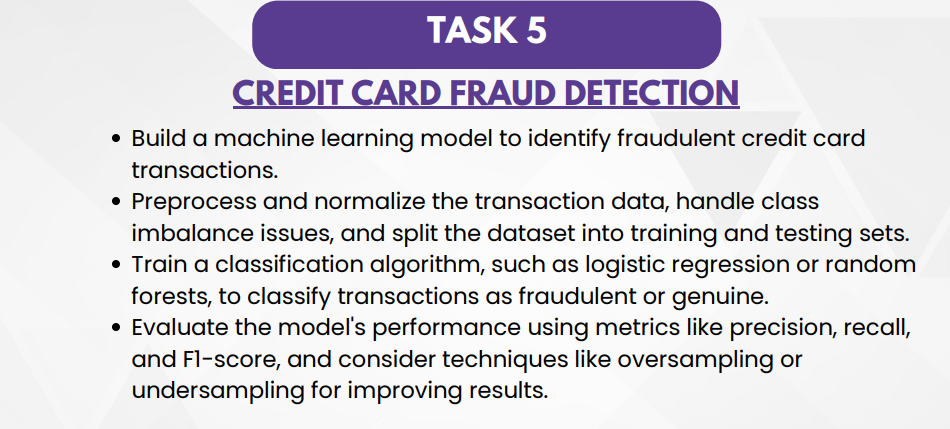

In [7]:
!pip install imbalanced-learn

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
dfcard = pd.read_csv(r"C:\Users\Shaikh PC\Downloads\Compressed\creditcard.csv")

In [42]:
dfcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
dfcard.shape

(284807, 31)

In [45]:
dfcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [46]:
dfcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


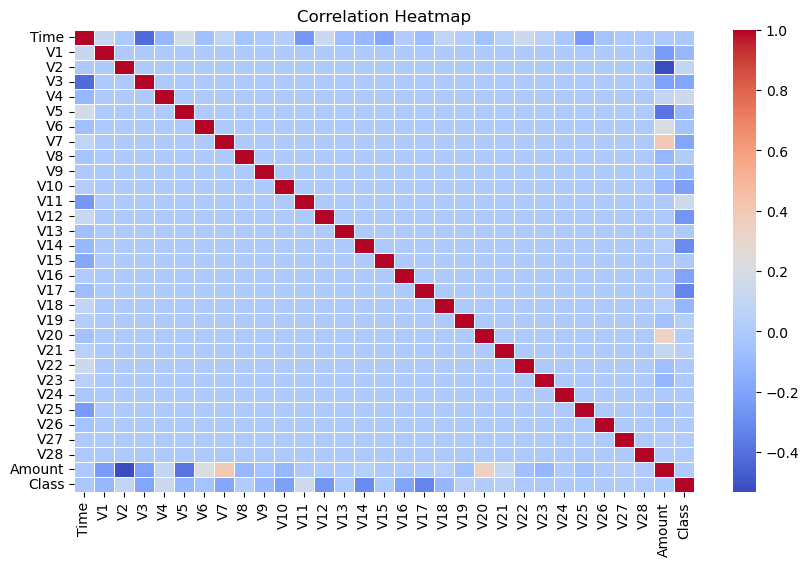

In [47]:
correl = dfcard.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correl, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [48]:
dfcard["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [49]:
reduced_data = dfcard.sample(n=20000, random_state=42)
reduced_data.to_csv('reduced_dataset.csv', index=False)

In [50]:
reduced_data = pd.read_csv('reduced_dataset.csv')

X = reduced_data.drop(['Class','Time'], axis=1)
Y = reduced_data['Class']

rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resample, Y_resample = rus.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_resample, Y_resample, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_std, Y_train)

rf = grid_search.best_estimator_
rf.fit(X_train_std, Y_train)

print("\t\t\tRANDOM FOREST CLASSIFIER\t\t\t\t\n")
rf_train = rf.predict(X_train_std)
print("Accuracy Score on Training Data:", accuracy_score(Y_train, rf_train))
print("F1 Score on Training Data:", f1_score(Y_train, rf_train))

print("\n\n*********************\n\n")

rf_test = rf.predict(X_test_std)
print("Accuracy Score on Testing Data:", accuracy_score(Y_test, rf_test))
print("F1 Score on Testing Data:", f1_score(Y_test, rf_test))

print("\n\n*********************\n\n")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_test))

print("\nClassification Report:")
print(classification_report(Y_test, rf_test))


			RANDOM FOREST CLASSIFIER				

Accuracy Score on Training Data: 1.0
F1 Score on Training Data: 1.0


*********************


Accuracy Score on Testing Data: 0.8571428571428571
F1 Score on Testing Data: 0.8


*********************


Confusion Matrix:
[[8 0]
 [2 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.67      0.80         6

    accuracy                           0.86        14
   macro avg       0.90      0.83      0.84        14
weighted avg       0.89      0.86      0.85        14



### **Taking input from the user**




In [52]:
V1 = float(input("Enter Data for V1: "))
V2 = float(input("Enter Data for V2: "))
V3 = float(input("Enter Data for V3: "))
V4 = float(input("Enter Data for V4: "))
V5 = float(input("Enter Data for V5: "))
V6 = float(input("Enter Data for V6: "))
V7 = float(input("Enter Data for V7: "))
V8 = float(input("Enter Data for V8: "))
V9 = float(input("Enter Data for V9: "))
V10 = float(input("Enter Data for V10: "))
V11 = float(input("Enter Data for V11: "))
V12 = float(input("Enter Data for V12: "))
V13 = float(input("Enter Data for V13: "))
V14 = float(input("Enter Data for V14: "))
V15 = float(input("Enter Data for V15: "))
V16 = float(input("Enter Data for V16: "))
V17 = float(input("Enter Data for V17: "))
V18 = float(input("Enter Data for V18: "))
V19 = float(input("Enter Data for V19: "))
V20 = float(input("Enter Data for V20: "))
V21 = float(input("Enter Data for V21: "))
V22 = float(input("Enter Data for V22: "))
V23 = float(input("Enter Data for V23: "))
V24 = float(input("Enter Data for V24: "))
V25 = float(input("Enter Data for V25: "))
V26 = float(input("Enter Data for V26: "))
V27 = float(input("Enter Data for V27: "))
V28 = float(input("Enter Data for V28: "))
amount = float(input("Enter Data for Amount: "))


user_input = np.array([[V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount]])

credit_card = rf.predict(user_input)

print("\n")

if (credit_card[0]==0):
  print("The Transaction is Valid!!!")
else:
  print("The Transaction is Fraudlent!!!")

Enter Data for V1:  12
Enter Data for V2:  12
Enter Data for V3:  34
Enter Data for V4:  45
Enter Data for V5:  45
Enter Data for V6:  34
Enter Data for V7:  234
Enter Data for V8:  23
Enter Data for V9:  45
Enter Data for V10:  234
Enter Data for V11:  23
Enter Data for V12:  45
Enter Data for V13:  23
Enter Data for V14:  12
Enter Data for V15:  43
Enter Data for V16:  56
Enter Data for V17:  24
Enter Data for V18:  54
Enter Data for V19:  67
Enter Data for V20:  34
Enter Data for V21:  65
Enter Data for V22:  56
Enter Data for V23:  76
Enter Data for V24:  23
Enter Data for V25:  56
Enter Data for V26:  65
Enter Data for V27:  56
Enter Data for V28:  45
Enter Data for Amount:  50000




The Transaction is Valid!!!
